In [1]:
import torch
import torch.nn as nn

from drdmannturb.parameters import (
    LossParameters,
    NNParameters,
    PhysicalParameters,
    ProblemParameters,
)
from drdmannturb.spectra_fitting import CalibrationProblem, OnePointSpectraDataGenerator
from drdmannturb import EddyLifetimeType

# %%

# from drdmannturb.shared.parameters import (
# LossParameters,
# NNParameters,
# PhysicalParameters,
# ProblemParameters,
# )

device = "cuda" if torch.cuda.is_available() else "cpu"

# v2: torch.set_default_device('cuda:0')
if torch.cuda.is_available():
    torch.set_default_tensor_type("torch.cuda.FloatTensor")


In [6]:

L = 0.59

Gamma = 3.9
sigma = 3.2

domain = torch.logspace(-1, 2, 20)

# %%
pb = CalibrationProblem(
    nn_params=NNParameters(
        nlayers=2,
        hidden_layer_sizes=[10, 10],
        activations=[nn.GELU(), nn.GELU()],
    ),
    prob_params=ProblemParameters(nepochs=10, eddy_lifetime=EddyLifetimeType.MANN_APPROX),
    loss_params=LossParameters(),
    phys_params=PhysicalParameters(L=L, Gamma=Gamma, sigma=sigma, domain=domain),
    device=device,
)


(808020, 1) (808020, 1)
[2.08226924] [[-0.75492007]]
Mann Linear Approximation R2 Score in log-log space: 0.9907896661583097
Initial loss: 1.7969229747933007


100%|██████████| 10/10 [00:00<00:00, 14.94it/s]


Spectra fitting concluded with final loss: 0.050620823708188906


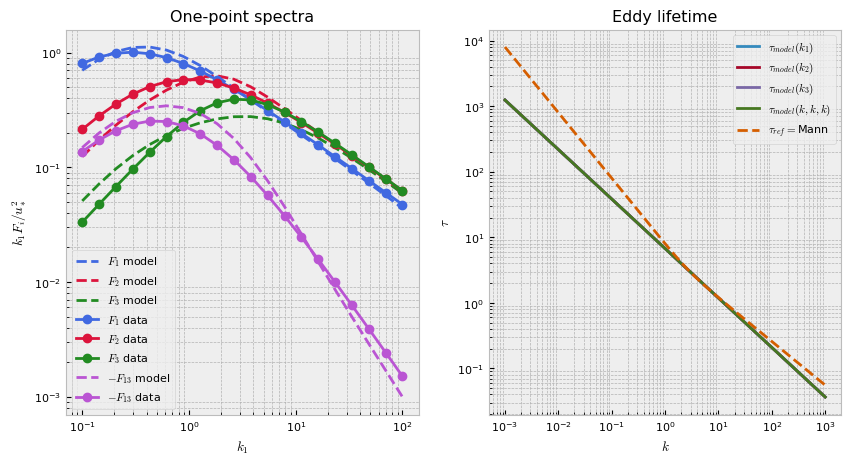

In [7]:

# %%
k1_data_pts = domain
DataPoints = [(k1, 1) for k1 in k1_data_pts]

# %%
Data = OnePointSpectraDataGenerator(data_points=DataPoints).Data

# %%
pb.eval(k1_data_pts)
optimal_parameters = pb.calibrate(data=Data)

# %%
pb.plot()